In [1]:
import pandas as pd
import numpy as np

# import random as rnd
# import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

## 0. Project Guide

https://github.com/thisismetis/NBM_Classification_Student/blob/main/curriculum/classification-workflow/classification-workflow.md

https://github.com/thisismetis/NBM_Classification_Student/blob/main/curriculum/project-introduction/project_success_guide.md
    
https://github.com/thisismetis/NBM_Classification_Student/blob/main/curriculum/project-introduction/project_intro.md

## 1. Load data & cleaning

In [2]:
loans = pd.read_csv('data/Loan_status_2007-2020Q3.gzip')  # , low_memory=False) 
# pd.read_csv('directory/ csv stored file name')

# Ignore DtypeWarnings from pandas' read_csv                                                                                                                                                                                            
#warnings.filterwarnings('ignore', message="^Columns.*")

FileNotFoundError: [Errno 2] No such file or directory: 'data/Loan_status_2007-2020Q3.gzip'

In [185]:
loans.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [186]:
del loans['Unnamed: 0']

In [187]:
loans.info()
loans.shape  #141 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 3.1+ GB


(2925493, 141)

###  1a. check features - drop or keep?

-  check all columns descriptions from Loan Dictionary 
-  drop the columns and rows that have too many missing values
-  and only keep the following columns based on the accessibility of data in the loan application.


In [188]:
# check missing values
loans.isnull().sum().sort_values(ascending = False)

hardship_loan_status    2782082
hardship_reason         2781861
hardship_status         2781858
hardship_dpd            2781856
hardship_type           2781855
                         ...   
out_prncp                     1
initial_list_status           1
revol_bal                     1
fico_range_high               1
id                            0
Length: 141, dtype: int64

In [189]:
# removing missing values: drop the columns which has more than 30 % of null values
mask = (loans.isnull().sum() > (2925493*0.3))    # 877647.9
# mask[mask == True]  

In [190]:
drop_missing_1  = list(mask[mask == True].index)
loans.drop(labels = drop_missing_1 , axis = 1, inplace = True)


In [191]:
# DROP LIST 1: missing more than 30 % 

sorted(drop_missing_1)

['annual_inc_joint',
 'deferral_term',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_num_rev_accts',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_revol_util',
 'verification_status_joint']

In [192]:
loans.shape

# 140 features cut down to 104

# KEEP LIST: now we have 104 features

# list(sorted(loans.columns)) 


(2925493, 104)

__Check Dictionary for DROP__
    
    # 必drop

'acc_open_past_24mths'
'collection_recovery_fee'
'emp_title'
'last_credit_pull_d'
'num_actv_rev_tl'
'num_rev_tl_bal_gt_0'
'open_acc_6m'
'out_prncp_inv'
'tax_liens'
'total_bal_il'
'total_cu_tl'
'total_pymnt'
'total_pymnt_inv'
'url'

    # not sure if I will drop

'addr_state'
'earliest_cr_line'
'initial_list_status'
'out_prncp_inv'
'policy_code'
'title'

### 1b. start with a subset for EDA and check features -  drop more!

In [193]:
# 0 : set subset to do baseline -> first 500 rows

subset = loans.iloc[:500,:]              
#subset = loans.iloc[-301:-1, :]  # the last 300 rows
subset

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1063602,16100.0,16100.0,16075.0,60 months,11.71%,355.79,B,B3,Akzo Nobel,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
496,1063393,35000.0,23250.0,23225.0,60 months,20.30%,619.88,E,E5,The Crexent Business Centers,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
497,1063388,10525.0,10525.0,10525.0,36 months,7.90%,329.33,A,A4,Pasadena city college,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
498,1063582,7200.0,7200.0,7200.0,36 months,15.96%,252.99,C,C5,Harrah's Resort,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N


In [194]:
# subset.describe()  # 79 out of 104 cols are numberic , the rest are catergorical

In [195]:
subset.isnull().sum().sort_values(ascending = False)

inq_last_12m             500
mths_since_recent_bc     500
mo_sin_rcnt_tl           500
mo_sin_rcnt_rev_tl_op    500
mo_sin_old_rev_tl_op     500
                        ... 
initial_list_status        0
total_acc                  0
revol_util                 0
revol_bal                  0
id                         0
Length: 104, dtype: int64

In [196]:
# drop the columns which has lots of of null values in subset 
# theory: if they are missing ALL in a smaller set, probably likely missing most of it in the main dataset and wont be useful for modeling

mask = (subset.isnull().sum() == 500)   
#mask[mask == True]

In [198]:
subset.shape  # features numbers cut down :  104 -> 58 features

(500, 58)

In [199]:
# DROP  LIST 2

sorted(drop_missing_2)

['acc_open_past_24mths',
 'all_util',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_limit',
 'total_cu_tl',
 'total_il_high_credit_limit',
 'total_rev_hi_lim']

In [200]:
# DROP LIST 3 

# Check Loan Dictionary definitions to take out less important features

drop_missing_3 = ['collection_recovery_fee',
                        'emp_title',
                        'last_credit_pull_d',
                        'tax_liens',
                        'total_pymnt',
                        'total_pymnt_inv',
                        'url']

subset.drop(labels = drop_missing_3 , axis = 1, inplace = True)
loans.drop(labels = drop_missing_3 , axis = 1, inplace = True)

In [201]:
loans.shape  # features numbers cut down :  58 -> 51 features

(2925493, 51)

In [202]:
# KEEP LIST: now we have 51 features

list(sorted(loans.columns)) # loans doesnt have issue_d_month ,issue_d_year yet. That will be adding 2 more features later

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'hardship_flag',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status',
 'zip_code']

### 1d. delete the rows have many missing values


In [203]:
subset[subset.isnull().any(axis=1)]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,hardship_flag,debt_settlement_flag
26,1069800,15000.0,15000.0,8725.0,36 months,14.27%,514.64,C,C2,9 years,...,555.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,N,N
168,1067644,2500.0,2500.0,2500.0,36 months,7.51%,77.78,A,A3,NaN,...,605.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,N,N
323,1058717,18000.0,18000.0,18000.0,60 months,17.58%,452.98,D,D4,NaN,...,660.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,N,N
394,1064582,4000.0,4000.0,4000.0,36 months,11.71%,132.31,B,B3,NaN,...,700.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,N,N
422,1064366,1000.0,1000.0,1000.0,36 months,14.65%,34.50,C,C3,NaN,...,0.0,0.0,1.0,Individual,0.0,0.0,0.0,1.0,N,N
439,1063912,8250.0,8250.0,8250.0,36 months,7.51%,256.67,A,A3,NaN,...,615.0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,N,N


In [204]:
# return only those rows have missing values

loans = loans[~loans.isnull().any(axis=1)]

In [205]:
loans.shape  # row numbers cut down :  2925493 -> 2657654

(2657654, 51)

### 1e. loan issued date (data timeframe)

In [206]:
loans.issue_d.sort_values(ascending= False)

1850683    Sep-2020
1845845    Sep-2020
1845843    Sep-2020
1845842    Sep-2020
1845841    Sep-2020
             ...   
41752      Apr-2008
41753      Apr-2008
41754      Apr-2008
41758      Apr-2008
38951      Apr-2008
Name: issue_d, Length: 2657654, dtype: object

confirm data are collected from 2008 April to 2020 September

In [207]:
loans.issue_d.value_counts(normalize= True)

Mar-2016    0.020087
Oct-2015    0.017123
Jul-2019    0.016962
Jul-2015    0.016286
Aug-2019    0.015920
              ...   
Jan-2008    0.000006
Feb-2008    0.000005
Dec-2007    0.000002
Oct-2007    0.000002
Nov-2007    0.000002
Name: issue_d, Length: 156, dtype: float64

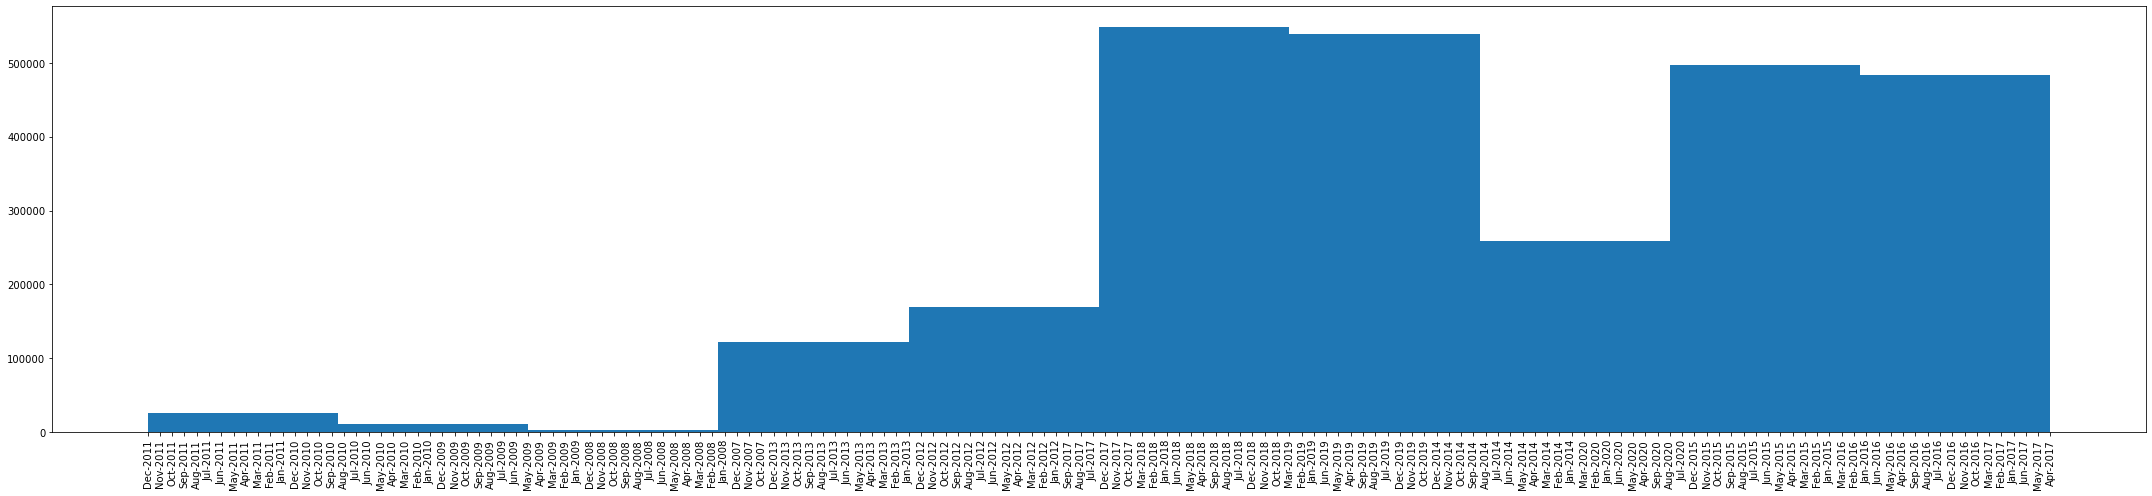

In [208]:
# Create histogram
fig, ax = plt.subplots(figsize =(30, 7), tight_layout = True)
ax.hist(loans.issue_d)  #, bins = [0, 25, 50, 75, 100])
plt.xticks(rotation='vertical')  
plt.show()

# wrong timeline. Fix later.

## 2. EDA and more data cleaning

### 2a. Target: loan_status (check Imbalance)
The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

In [209]:
loans.loan_status.unique() 
#subset.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Default', 'Issued'], dtype=object)

In [210]:
loans.loan_status.value_counts()

Fully Paid                                             1389476
Current                                                 925005
Charged Off                                             322095
Late (31-120 days)                                        9853
In Grace Period                                           6610
Late (16-30 days)                                         1763
Does not meet the credit policy. Status:Fully Paid        1506
Does not meet the credit policy. Status:Charged Off        518
Issued                                                     500
Default                                                    328
Name: loan_status, dtype: int64

In [211]:
# only pick Fully Paid and Charged Off

loans =  loans[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]
loans.shape  # row numbers cut down :  2657654  -> 1711571

(1711571, 51)

In [212]:
loans['loan_status'].value_counts(normalize=True)

Fully Paid     0.811813
Charged Off    0.188187
Name: loan_status, dtype: float64

- This is an imbalance problem. Fully Paid to Charged Off ratio are 8:2. It's because we have a lot more entries of people that fully paid their loans then people that did not pay back.

- We can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we will have to evaluate our model based off of.


### 2b. Timeframe : only take recent 3 years loan data : 2018 to 2020

In [213]:
loans[['issue_d']].value_counts()

issue_d 
Mar-2016    49638
Oct-2015    42575
Jul-2015    40962
Dec-2015    38453
Oct-2014    36676
            ...  
Feb-2008        7
Jan-2008        6
Dec-2007        2
Nov-2007        2
Oct-2007        1
Length: 156, dtype: int64

In [214]:
def loan_years(x, y):
    
    k = []

    for i in range(x, y+1):
        m1 = 'Jan' + '-' + str(i)
        m2 = 'Feb' + '-' + str(i)
        m3 = 'Mar' + '-' + str(i)
        m4 = 'Apr' + '-' + str(i)
        m5 = 'May' + '-' + str(i)    
        m6 = 'Jun' + '-' + str(i) 
        m7 = 'Jul' + '-' + str(i) 
        m8 = 'Aug' + '-' + str(i)
        m9 = 'Sep' + '-' + str(i)
        m10 = 'Oct' + '-' + str(i)
        m11 = 'Nov' + '-' + str(i)
        m12 = 'Dec' + '-' + str(i)

        k.append(m1)
        k.append(m2)
        k.append(m3)
        k.append(m4)
        k.append(m5)
        k.append(m6)
        k.append(m7)
        k.append(m8)
        k.append(m9)
        k.append(m10)
        k.append(m11)
        k.append(m12)
    
    
    return k

In [215]:
year_3 = loan_years(2018, 2020)[:-3]

In [216]:
# only take recent 3 years loan data : 2018 Jan to 2020 Sep
    
df = loans[loans['issue_d'].isin(year_3)]    
                            
df.reset_index(drop=True, inplace=True)
df.shape                                    

(246004, 51)

In [217]:
# save it into a smaller df as 2018 to 2020 for the sake of less memory and more speed.

df.to_csv('data/loan_2018_2020.csv') 

In [218]:
# randomly target imbalance check for year 2020

loans[loans['issue_d'].isin(['Jan-2020', 'Feb-2020', 'Mar-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'Jul-2020', 'Aug-2020', 'Sep-2020'])].loan_status.value_counts() 

Fully Paid     3644
Charged Off      22
Name: loan_status, dtype: int64

In [219]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.794137
Charged Off    0.205863
Name: loan_status, dtype: float64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246004 entries, 0 to 246003
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          246004 non-null  object 
 1   loan_amnt                   246004 non-null  float64
 2   funded_amnt                 246004 non-null  float64
 3   funded_amnt_inv             246004 non-null  float64
 4   term                        246004 non-null  object 
 5   int_rate                    246004 non-null  object 
 6   installment                 246004 non-null  float64
 7   grade                       246004 non-null  object 
 8   sub_grade                   246004 non-null  object 
 9   emp_length                  246004 non-null  object 
 10  home_ownership              246004 non-null  object 
 11  annual_inc                  246004 non-null  float64
 12  verification_status         246004 non-null  object 
 13  issue_d       

### 2c. Features Checking

1. numerical features

2. catergorical features

In [221]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [222]:
df.describe(include=np.object)

,id,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,application_type,hardship_flag,debt_settlement_flag
count,246004,246004,246004,246004,246004,246004,246004,246004,246004,246004,...,246004,246004,246004,246004,246004,246004,246004,246004,246004,246004
unique,246004,2,152,7,35,11,4,3,33,2,...,12,884,50,658,1099,2,34,2,2,2
top,148046796,36 months,8.19%,B,A4,10+ years,MORTGAGE,Source Verified,May-2018,Fully Paid,...,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jul-2019,Individual,N,N
freq,1,180668,6669,66891,15953,85254,124361,103383,18259,195361,...,131062,2658,35096,2321,3207,211241,15609,216302,244943,240959


#### 2c1. id

From Data Dictionary and the above chart, we found id is unique for each loan record, and it's not helpful for modeling, so we drop this feature.

#### 2c2. loan_amnt 

In [224]:
df['loan_amnt'].describe()

count    246004.000000
mean      15435.868624
std       10079.596159
min        1000.000000
25%        7943.750000
50%       12750.000000
75%       20650.000000
max       40000.000000
Name: loan_amnt, dtype: float64

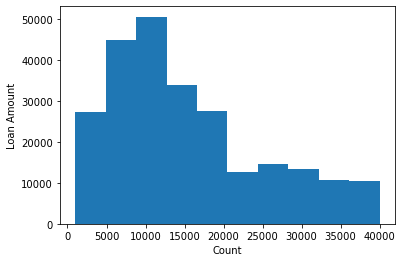

In [225]:
plt.hist(df['loan_amnt'])  #, density=True)
plt.ylabel('Loan Amount')
plt.xlabel('Count');

In [226]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,17640.007010,10227.883732,1000.0,10000.0,15000.0,25000.0,40000.0
Fully Paid,195361.0,14864.494705,9961.541143,1000.0,7000.0,12000.0,20000.0,40000.0


#### 2c3. funded_amnt & funded_amnt_inv


Check Data Dictionary and EDA below, both are similar to loan amount but won't add much values for modeling, so we decided to drop these two features. 

- funded_amnt	: The total amount committed to that loan at that point in time.
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

In [227]:
df['funded_amnt'].describe()

count    246004.000000
mean      15435.868624
std       10079.596159
min        1000.000000
25%        7943.750000
50%       12750.000000
75%       20650.000000
max       40000.000000
Name: funded_amnt, dtype: float64

(array([27232., 44840., 50605., 34035., 27576., 12726., 14703., 13325.,
        10606., 10356.]),
 array([ 1000.,  4900.,  8800., 12700., 16600., 20500., 24400., 28300.,
        32200., 36100., 40000.]),
 <BarContainer object of 10 artists>)

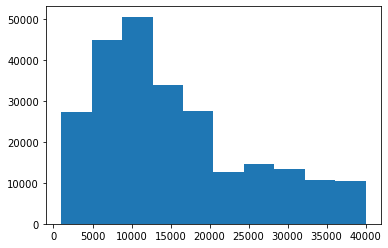

In [228]:
plt.hist(df['funded_amnt'])

In [229]:
df['funded_amnt_inv'].describe()

count    246004.000000
mean      15432.548472
std       10079.679752
min         725.000000
25%        7825.000000
50%       12750.000000
75%       20650.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64

(array([25651., 46199., 50538., 33856., 27803., 12928., 14726., 13324.,
        10620., 10359.]),
 array([  725. ,  4652.5,  8580. , 12507.5, 16435. , 20362.5, 24290. ,
        28217.5, 32145. , 36072.5, 40000. ]),
 <BarContainer object of 10 artists>)

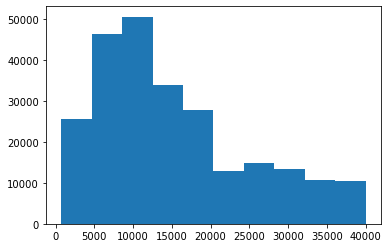

In [230]:
plt.hist(df['funded_amnt_inv'])

#### 2c4. term

From Data Dictionary
- term: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [232]:
df['term'].value_counts()

 36 months    180668
 60 months     65336
Name: term, dtype: int64

In [234]:
df['term'].value_counts(normalize=True)

36    0.734411
60    0.265589
Name: term, dtype: float64

73% are 36 months term and 26% are 60 months term.

In [235]:
df.groupby('term')['loan_status'].describe()

,count,unique,top,freq
term,,,,
36,180668,2,Fully Paid,149751
60,65336,2,Fully Paid,45610


In [236]:
df.groupby('term')['loan_status'].value_counts(normalize=True)

term  loan_status
36    Fully Paid     0.828874
      Charged Off    0.171126
60    Fully Paid     0.698084
      Charged Off    0.301916
Name: loan_status, dtype: float64

__Based on Charged Off percentage by loan terms, 60 months have higher rate than 30 months.__

#### 2c5. installment

From Data Dictionary
- installment: The monthly payment owed by the borrower if the loan originates.

In [237]:
df['installment'].describe()

count    246004.000000
mean        461.022379
std         293.113356
min          28.770000
25%         243.780000
50%         379.280000
75%         627.470000
max        1676.230000
Name: installment, dtype: float64

In [238]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,525.379699,296.584284,30.12,300.66,466.10,713.945,1664.57
Fully Paid,195361.0,444.339173,289.884938,28.77,228.68,364.86,607.110,1676.23


Charged off loans tend to have higher installments. Loans that charge off have $81 higher installments on average.

#### 2c6 . emp_length

From Data Dictionary
- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [239]:
df['emp_length'].value_counts()

10+ years    85254
< 1 year     24536
2 years      24391
3 years      22044
1 year       18477
5 years      17097
4 years      17015
6 years      11976
7 years       9754
8 years       8719
9 years       6741
Name: emp_length, dtype: int64

In [240]:
df.groupby('loan_status')['emp_length'].value_counts()  #df.groupby(['loan_status','emp_length']).count() 

loan_status  emp_length
Charged Off  10+ years     15855
             < 1 year       5971
             2 years        5158
             3 years        4781
             1 year         4169
             4 years        3697
             5 years        3654
             6 years        2371
             7 years        1952
             8 years        1765
             9 years        1270
Fully Paid   10+ years     69399
             2 years       19233
             < 1 year      18565
             3 years       17263
             1 year        14308
             5 years       13443
             4 years       13318
             6 years        9605
             7 years        7802
             8 years        6954
             9 years        5471
Name: emp_length, dtype: int64

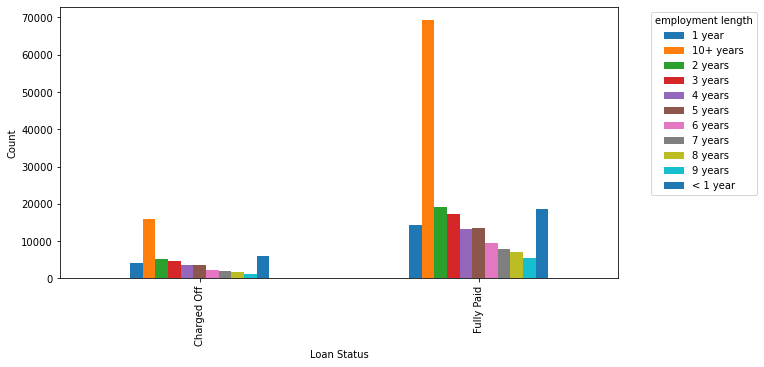

In [241]:
# to get the dataframe in the correct shape, unstack the groupby result
emp = df.groupby(['loan_status']).emp_length.value_counts().unstack()

# plot
emp.plot.bar(figsize=(10, 5))
plt.legend(title='employment length', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The employment length doesn't affect much differnce on Loan Status (Charge Off/Fully Paid). Both have the highest number on 10+ year employment length and followed by < 1 year. Or we can say that people who worked longer than 10 years or less than 1 year are the biggest group of people taking loans on Lending Club. As the feature can't help us to predict on loan status, we dropped this.

#### 2c7 . home_ownership

From Data Dictionary
- home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [243]:
df['home_ownership'].value_counts()

MORTGAGE    124361
RENT         93422
OWN          27639
ANY            582
Name: home_ownership, dtype: int64

In [245]:
df['home_ownership'].value_counts()

MORTGAGE    124361
RENT         93422
OWN          27639
OTHER          582
Name: home_ownership, dtype: int64

In [246]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize= True)   #.loc[:,'Charged Off']

home_ownership  loan_status
MORTGAGE        Fully Paid     0.830767
                Charged Off    0.169233
OTHER           Fully Paid     0.785223
                Charged Off    0.214777
OWN             Fully Paid     0.792286
                Charged Off    0.207714
RENT            Fully Paid     0.745981
                Charged Off    0.254019
Name: loan_status, dtype: float64

The home ownership as RENT has the highest rate of Charged Off on loan, and has the lowest rate on MORTAGE home ownership.

#### 2c8 . annual_inc

From Data Dictionary
   - annual_inc: The self-reported annual income provided by the borrower during registration. 

In [247]:
df['annual_inc'].value_counts()

60000.00     9598
50000.00     8052
65000.00     7502
70000.00     7068
80000.00     7018
             ... 
53486.09        1
108145.00       1
307800.00       1
57358.00        1
80922.00        1
Name: annual_inc, Length: 15459, dtype: int64

In [248]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,78542.441475,73241.419492,32.0,47000.0,65000.0,93000.0,6118054.0
Fully Paid,195361.0,85325.202394,88350.330579,0.0,50000.0,70000.0,100000.0,9300000.0


On average, higher annual income people are more likely to fully paid off the loan.

#### 2c9. verification_status

From Data Dictionary
   - Indicates if income was verified by LC, not verified, or if the income source was verified

In [250]:
df['verification_status'].value_counts()

Source Verified    103383
Not Verified        97926
Verified            44695
Name: verification_status, dtype: int64

In [251]:
df.groupby('loan_status')['verification_status'].value_counts(normalize= True)

loan_status  verification_status
Charged Off  Source Verified        0.436704
             Not Verified           0.319235
             Verified               0.244061
Fully Paid   Not Verified           0.418502
             Source Verified        0.415984
             Verified               0.165514
Name: verification_status, dtype: float64

In [252]:
df.drop('verification_status', axis =1 , inplace = True)

#### 2c10. pymnt_plan, purpose, title, zipcode and address_state

Aftering checking Data Dictionary and EDA, we decide to drop 
- pymnt_plan
- title
- zipcode (we have add_state)

In [253]:
df['pymnt_plan'].describe()  # drop

count     246004
unique         1
top            n
freq      246004
Name: pymnt_plan, dtype: object

In [254]:
df['purpose'].value_counts()

debt_consolidation    131062
credit_card            57257
other                  18361
home_improvement       17281
major_purchase          6404
medical                 3435
house                   3084
car                     2744
small_business          2328
vacation                2053
moving                  1826
renewable_energy         165
wedding                    4
Name: purpose, dtype: int64

In [255]:
df['title'].value_counts() # similar to Purpose -> drop

Debt consolidation         131062
Credit card refinancing     57257
Other                       18365
Home improvement            17281
Major purchase               6404
Medical expenses             3435
Home buying                  3084
Car financing                2744
Business                     2328
Vacation                     2053
Moving and relocation        1826
Green loan                    165
Name: title, dtype: int64

In [256]:
df['zip_code'].value_counts()   # drop

750xx    2658
945xx    2617
112xx    2324
891xx    2282
300xx    2254
         ... 
621xx       1
503xx       1
340xx       1
861xx       1
987xx       1
Name: zip_code, Length: 884, dtype: int64

In [257]:
df['addr_state'].describe()

count     246004
unique        50
top           CA
freq       35096
Name: addr_state, dtype: object

In [258]:
drop_list = ['pymnt_plan', 'title', 'zip_code']

#### 2c11. dti 

From Data Dictionary __(Debt to Income)__
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [260]:
df['dti'].describe()

count    246004.000000
mean         18.891880
std          17.394448
min           0.000000
25%          11.100000
50%          17.260000
75%          24.440000
max         999.000000
Name: dti, dtype: float64

In [261]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,20.246928,19.100338,0.0,11.835,18.63,26.22,999.0
Fully Paid,195361.0,18.540614,16.906529,0.0,10.940,16.95,23.94,999.0


People who Chargd Off have higher ratio of dti than Fully Paid group. Max value 999 shows there's some outliers.


#### 2c12. delinq_2yrs

From Data Dictionary
- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [262]:
df['delinq_2yrs'].describe()

count    246004.000000
mean          0.233744
std           0.759470
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: delinq_2yrs, dtype: float64

In [263]:
df.groupby('loan_status')['delinq_2yrs'].value_counts(normalize= True) #.loc[:,'Charged Off']

loan_status  delinq_2yrs
Charged Off  0.0            0.840215
             1.0            0.110854
             2.0            0.027368
             3.0            0.010979
             4.0            0.004996
             5.0            0.002172
             6.0            0.001283
             7.0            0.000652
             8.0            0.000553
             9.0            0.000296
             11.0           0.000178
             12.0           0.000138
             10.0           0.000118
             15.0           0.000059
             13.0           0.000039
             14.0           0.000039
             17.0           0.000020
             21.0           0.000020
             23.0           0.000020
Fully Paid   0.0            0.856061
             1.0            0.101208
             2.0            0.024775
             3.0            0.009157
             4.0            0.003875
             5.0            0.001873
             6.0            0.001162
             

In [264]:
# cant tell the % difference between Charged Off and Fully Paid -> should I drop?

#### 2c13. earliest_cr_line

From Data Dictionary
- The month the borrower's earliest reported credit line was opened.

In [265]:
df['earliest_cr_line'].sample(3)

89571    Oct-2009
41819    May-1986
75032    Jul-2013
Name: earliest_cr_line, dtype: object

In [266]:
# keep only year

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda s: int(s[-4:]))

<ipython-input-266-83f3cc9559aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda s: int(s[-4:]))


In [267]:
df['earliest_cr_line'].sample(3)

135781    1996
52383     2008
198141    2007
Name: earliest_cr_line, dtype: int64

In [268]:
df['earliest_cr_line'].describe()

count    246004.000000
mean       2002.817503
std           7.288250
min        1944.000000
25%        1999.000000
50%        2004.000000
75%        2007.000000
max        2017.000000
Name: earliest_cr_line, dtype: float64

In [269]:
df.groupby('loan_status')['earliest_cr_line'].value_counts(normalize= True)

loan_status  earliest_cr_line
Charged Off  2006                0.084533
             2005                0.080130
             2007                0.076852
             2004                0.070395
             2003                0.057935
                                   ...   
Fully Paid   1951                0.000005
             1954                0.000005
             1956                0.000005
             1957                0.000005
             1959                0.000005
Name: earliest_cr_line, Length: 124, dtype: float64

Borrowers who are charged-off tend to have shorter lines of credit.

#### 2c14. inq_last_6mths

From Data Dictionary
- The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

In [270]:
df.groupby('loan_status')['inq_last_6mths'].value_counts(normalize= True)

loan_status  inq_last_6mths
Charged Off  0.0               0.570859
             1.0               0.287621
             2.0               0.103074
             3.0               0.034279
             4.0               0.003001
             5.0               0.001165
Fully Paid   0.0               0.634635
             1.0               0.258839
             2.0               0.079197
             3.0               0.023787
             4.0               0.002616
             5.0               0.000926
Name: inq_last_6mths, dtype: float64

In [271]:
# can't tell the % difference between Charged Off and Fully Paid -> should I drop?

#### 2c15. open_acc

From Data Dictionary
- The number of open credit lines in the borrower's credit file.

In [272]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,11.595166,5.951375,1.0,7.0,11.0,15.0,78.0
Fully Paid,195361.0,11.678948,5.942649,1.0,7.0,11.0,15.0,86.0


In [273]:
# Is there a difference in number of credit lines between fully paid loans and charged-off loans?

# -> drop?

#### 2c16. pub_rec

From Data Dictionary
- Number of derogatory public records.

In [274]:
df.groupby('loan_status')['pub_rec'].value_counts(normalize= True)

loan_status  pub_rec
Charged Off  0.0        0.856683
             1.0        0.137551
             2.0        0.003791
             3.0        0.001126
             4.0        0.000553
             5.0        0.000158
             7.0        0.000079
             6.0        0.000039
             10.0       0.000020
Fully Paid   0.0        0.867988
             1.0        0.128234
             2.0        0.002744
             3.0        0.000604
             4.0        0.000210
             5.0        0.000138
             6.0        0.000046
             7.0        0.000010
             8.0        0.000010
             9.0        0.000005
             13.0       0.000005
             52.0       0.000005
Name: pub_rec, dtype: float64

In [275]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,0.152499,0.399569,0.0,0.0,0.0,0.0,10.0
Fully Paid,195361.0,0.137873,0.387796,0.0,0.0,0.0,0.0,52.0


In [276]:
# Is there a difference in average public records between fully paid loans and charged-off loans?

# -> drop?

#### 2c17. revol_bal

From Data Dictionary
- Total credit revolving balance.

In [277]:
df.groupby('loan_status')['revol_bal'].value_counts(normalize= True)

loan_status  revol_bal
Charged Off  0.0          0.010386
             8.0          0.000434
             4.0          0.000237
             5.0          0.000237
             2.0          0.000197
                            ...   
Fully Paid   866850.0     0.000005
             925589.0     0.000005
             1113293.0    0.000005
             1137891.0    0.000005
             1392002.0    0.000005
Name: revol_bal, Length: 72280, dtype: float64

#### 2c18. revol_util

From Data Dictionary
- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [280]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,45.299277,24.928874,0.0,26.1,44.1,63.9,130.0
Fully Paid,195361.0,39.973285,25.131865,0.0,19.6,37.0,58.0,146.3


In [281]:
# Is there a difference in average Revolving line utilization rate between fully paid loans and charged-off loans?
# 4% difference

# TAQ? -> drop?
# df.drop('revol_util', axis = 1, inplace = True)

#### 2c19. total_acc

From Data Dictionary: The total number of credit lines currently in the borrower's credit file.

In [282]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,22.394309,12.324837,2.0,13.0,20.0,29.0,148.0
Fully Paid,195361.0,24.404062,12.713202,2.0,15.0,22.0,31.0,145.0


No large differences here.

In [283]:
# drop?

# TAQ? -> drop?
# df.drop('total_acc', axis = 1, inplace = True)

#### 2c20. initial_list_status

From Data Dictionary: The initial listing status of the loan. Possible values are – W, F.

In [284]:
df.groupby('loan_status')['initial_list_status'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,50643,2,w,43232
Fully Paid,195361,2,w,168009


#### 2c21. out_prncp, out_prncp_inv

From Data Dictionary: 
- Remaining outstanding principal for total amount funded
- Remaining outstanding principal for portion of total amount funded by investors

In [286]:
df.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,195361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
df.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,195361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2c21. total_rec_prncp,  total_rec_int,  total_rec_late_fee,  recoveries

From Data Dictionary:   
- Principal received to date
- Interest received to date
- Late fees received to date
- post charge off gross recovery

In [289]:
df.groupby('loan_status')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,2855.705366,2822.567965,0.0,994.32,2007.67,3740.305,37600.0
Fully Paid,195361.0,14864.491947,9961.540903,1000.0,7000.00,12000.00,20000.000,40000.0


In [290]:
df.groupby('loan_status')['total_rec_int'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,1870.648515,1737.902332,0.0,629.055,1328.41,2559.395,19225.34
Fully Paid,195361.0,1325.230779,1489.293641,0.0,342.990,829.74,1758.070,19051.56


In [291]:
df.groupby('loan_status')['total_rec_late_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,5.160376,19.509210,0.0,0.0,0.0,0.0,621.80
Fully Paid,195361.0,0.619916,7.193984,0.0,0.0,0.0,0.0,749.21


In [292]:
df.groupby('loan_status')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,1133.618703,1764.763936,0.0,0.0,150.0,1885.37,40889.68
Fully Paid,195361.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00


Fully Paid borrowers have much higher average Total Received Principal, lower Total Received Interest, and much lower Total Received Late Fee, and have 0 Recoveries than Charged Off borrowers.

But can these features apply on a new customer? (seems only applied on existing customers)


#### 2c22. last_pymnt_d,  last_pymnt_amnt

From Data Dictionary:   
- Last total payment amount received
- Last month payment was received

In [294]:
df.groupby('last_pymnt_d')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

last_pymnt_d
Apr-2018    0.155827
Apr-2019    0.261070
Apr-2020    0.023647
Aug-2018    0.266227
Aug-2019    0.256876
Aug-2020    0.004545
Dec-2018    0.275360
Dec-2019    0.205036
Feb-2018    0.069869
Feb-2019    0.253117
Feb-2020    0.126829
Jan-2018    0.004184
Jan-2019    0.291761
Jan-2020    0.062514
Jul-2018    0.243590
Jul-2019    0.251906
Jul-2020    0.011696
Jun-2018    0.205465
Jun-2019    0.259625
Jun-2020    0.017921
Mar-2018    0.112985
Mar-2019    0.264958
Mar-2020    0.054757
May-2018    0.194582
May-2019    0.263101
May-2020    0.025899
Nov-2018    0.288982
Nov-2019    0.221524
Oct-2018    0.281388
Oct-2019    0.245413
Sep-2018    0.271608
Sep-2019    0.254797
Name: loan_status, dtype: float64

In [295]:
df.groupby('loan_status')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,532.097710,708.156827,-2000.0,273.70,442.43,702.19,37600.00
Fully Paid,195361.0,10475.619345,9125.807210,0.0,3423.17,8211.14,15176.60,42163.62


#### 2c23. collections_12_mths_ex_med

From Data Dictionary:  Number of collections in 12 months excluding medical collections

In [297]:
df.groupby('loan_status')['collections_12_mths_ex_med'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,0.022392,0.163912,0.0,0.0,0.0,0.0,6.0
Fully Paid,195361.0,0.015935,0.136151,0.0,0.0,0.0,0.0,8.0


In [298]:
df.groupby('collections_12_mths_ex_med')['loan_status'].value_counts(normalize=True) #.loc[:,'Charged Off']

collections_12_mths_ex_med  loan_status
0.0                         Fully Paid     0.795085
                            Charged Off    0.204915
1.0                         Fully Paid     0.737015
                            Charged Off    0.262985
2.0                         Fully Paid     0.739669
                            Charged Off    0.260331
3.0                         Charged Off    0.500000
                            Fully Paid     0.500000
4.0                         Charged Off    0.571429
                            Fully Paid     0.428571
5.0                         Fully Paid     1.000000
6.0                         Charged Off    1.000000
8.0                         Fully Paid     1.000000
Name: loan_status, dtype: float64

In [299]:
# not outstanding differnce on the percentage wise.
# DONT drop # TAQ?
# PUT IT BACK!!!!!!!

# df.drop('collections_12_mths_ex_med', axis = 1, inplace = True)

#### 2c24.  application_type


Loan Dict: Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [300]:
df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.201995
Joint App     0.234025
Name: loan_status, dtype: float64

In [301]:
# Joint has 3% higher rate of Charged Off probability than Individual, but not huge difference
# drop? # TAQ
# PUT IT BACK
# df.drop('application_type', axis = 1, inplace = True)

#### 2c25.  acc_now_delinq, chargeoff_within_12_mths  , delinq_amnt,  pub_rec_bankruptcies, hardship_flag , debt_settlement_flag

Loan Dict: 
1. acc_now_delinq: The number of accounts on which the borrower is now delinquent.
2. chargeoff_within_12_mths: Number of charge-offs within 12 months
3. delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.
4. pub_rec_bankruptcies: Number of public record bankruptcies
5. hardship_flag: Flags whether or not the borrower is on a hardship plan
6. debt_settlement_flag: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

In [302]:
# keep
df.groupby('acc_now_delinq')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

acc_now_delinq
0.0    0.205847
1.0    0.437500
Name: loan_status, dtype: float64

In [303]:
# keep
df.groupby('chargeoff_within_12_mths')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

chargeoff_within_12_mths
0.0    0.205624
1.0    0.238606
2.0    0.289474
3.0    0.350000
Name: loan_status, dtype: float64

In [304]:
# keep
df.groupby('loan_status')['delinq_amnt'].describe()

# Charged Off have average higher amount, but there's some outlier ($65000) in Fully Paid group.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,3.093991,239.500329,0.0,0.0,0.0,0.0,33781.0
Fully Paid,195361.0,1.646373,236.495162,0.0,0.0,0.0,0.0,65000.0


In [305]:
# keep
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,0.139822,0.357515,0.0,0.0,0.0,0.0,7.0
Fully Paid,195361.0,0.129775,0.341871,0.0,0.0,0.0,0.0,6.0


In [306]:
df.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

pub_rec_bankruptcies
0.0    0.204196
1.0    0.216131
2.0    0.278788
3.0    0.294118
4.0    0.615385
7.0    1.000000
Name: loan_status, dtype: float64

In [307]:
# drop
df.groupby('hardship_flag')['loan_status'].value_counts(normalize=True)  #.loc[:,'Charged Off']

hardship_flag  loan_status
N              Fully Paid     0.793381
               Charged Off    0.206619
Y              Fully Paid     0.968897
               Charged Off    0.031103
Name: loan_status, dtype: float64

In [308]:
# drop
df.groupby('debt_settlement_flag')['loan_status'].value_counts(normalize=True)  #.loc[:,'Charged Off']

debt_settlement_flag  loan_status
N                     Fully Paid     0.810760
                      Charged Off    0.189240
Y                     Charged Off    0.999802
                      Fully Paid     0.000198
Name: loan_status, dtype: float64

Again, we only want the features that are accessible for a new customer, so we drop the following features
- only keep 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies'

### 2d. Set aside the features from finance institution 

some of the features were created by the Lending Club/some financial institution

 
- interest rate         (numerical)
- grade                 (categorical)
- subgrade              (categorical)
- policy code           (delete)
- last_fico_range_high  (numerical)
- last_fico_range_low   (numerical)
- fico_range_high       (numerical)
- fico_range_low        (numerical)


These are likely good predictors of who will pay back their loans, but they are also features that were likely created by financial professionals who are already judging the applicants. That is to say, we may not have access to features like these when a new person applies for a loan. 
Just give it some thought on how the model will be used and what type of information we would like our model to have access too. We can also try modeling **with and without these features** to see how big of a difference they make.

#### 2d1. int_rate

Data Dictionary: "Interest Rate on the loan."


In [311]:
df.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,15.818440,5.439015,5.31,11.80,15.04,19.42,30.99
Fully Paid,195361.0,12.567271,5.149797,5.31,8.19,11.71,15.57,30.99


Charged-off loans tend to have much higher interest rates. 

#### 2d2. grade, sub_grade

Data Dictionary:
1. grade: "LendingClub assigned loan grade."
2. sub_grade: "LendingClub assigned loan subgrade."



In [312]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [313]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The grade is implied by the subgrade, so let's drop the grade column.

In [315]:
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

sub_grade
A1    0.054597
A2    0.054929
A3    0.070673
A4    0.088761
A5    0.102781
B1    0.126675
B2    0.148228
B3    0.161509
B4    0.184785
B5    0.204518
C1    0.231784
C2    0.248617
C3    0.258369
C4    0.281550
C5    0.290978
D1    0.303773
D2    0.310073
D3    0.340875
D4    0.353904
D5    0.368884
E1    0.357459
E2    0.373455
E3    0.449492
E4    0.441247
E5    0.452237
F1    0.480716
F2    0.537594
F3    0.480583
F4    0.517007
F5    0.554217
G1    0.482072
G2    0.515152
G3    0.444444
G4    0.583333
G5    0.583333
Name: loan_status, dtype: float64

#### 2d3. policy_code

Data Dictionary: "publicly available policy_code=1
new products not publicly available policy_code=2"



In [316]:
# we only have code =1 and nothing on 2  -> drop

df.drop('policy_code' , axis = 1, inplace = True)

#### 2d4. fico_range_low, fico_range_high, last_fico_range_low, last_fico_range_high

Data Dictionary: 
- fico_range_low: "The lower boundary range the borrower’s FICO at loan origination belongs to."
- fico_range_high: "The upper boundary range the borrower’s FICO at loan origination belongs to."

- last_fico_range_low:The lower boundary range the borrower’s last FICO pulled belongs to.

- last_fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to.


In [317]:
df[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,246004.000000,246004.000000
mean,707.323519,711.323767
std,36.632327,36.633262
min,660.000000,664.000000
25%,680.000000,684.000000
50%,700.000000,704.000000
75%,730.000000,734.000000
max,845.000000,850.000000


In [318]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [319]:
# only keep one fico score
df['fico_score'] = 0.5*df['fico_range_low'] + 0.5*df['fico_range_high']

<ipython-input-319-4919339c405f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fico_score'] = 0.5*df['fico_range_low'] + 0.5*df['fico_range_high']


In [321]:
df.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,699.108949,31.059802,662.0,677.0,692.0,717.0,847.5
Fully Paid,195361.0,711.971576,37.492683,662.0,682.0,707.0,732.0,847.5


We can see a noticeable difference in FICO scores between fully paid and charged-off loans. Loans that charge off have a FICO score 12 points lower on average.

##### last_fico_score

In [322]:
# do the same process for last_fico_score

# only keep one last fico score
df['last_fico_score'] = 0.5*df['last_fico_range_low'] + 0.5*df['last_fico_range_high']

# drop the other two
df.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)

<ipython-input-322-3bf90086baa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_fico_score'] = 0.5*df['last_fico_range_low'] + 0.5*df['last_fico_range_high']
/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [323]:
df.groupby('loan_status')['last_fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50643.0,528.164643,119.683647,249.5,522.0,552.0,592.0,847.5
Fully Paid,195361.0,717.862685,51.013184,0.0,687.0,717.0,752.0,847.5


Loans that charge off have a Last FICO score 189 points lower on average.

###  2e. Fin Pro : Set aside before finalizing features 

four features  (df_fin_pro)

    a. numerical: 'int_rate', 'fico_score', 'last_fico_score'
    
    b. catergorical: 'sub_grade'

#### Goal: only keep the features which are accessible( on KEEP LIST)

Finance Pro LIST: 
not accessible on application. Created seperately, can add or take out from modeling later, not including in KEEP LIST.    



In [324]:
fin_pro = ['int_rate', 'sub_grade', 'fico_score', 'last_fico_score' ]

In [325]:
# seperate df frame (df_fin pro) for future modeling included or excluded
df_fin_pro = df[fin_pro] 
df_fin_pro

,int_rate,sub_grade,fico_score,last_fico_score
0,23.87,E2,662.0,717.0
1,14.07,C3,692.0,542.0
2,11.98,B5,697.0,707.0
3,20.39,D4,667.0,592.0
4,9.43,B1,732.0,777.0
...,...,...,...,...
245999,9.56,A3,732.0,732.0
246000,9.02,A2,752.0,752.0
246001,18.24,C2,682.0,672.0
246002,10.19,A4,722.0,727.0


In [357]:
df_fin_pro.to_csv('data/loan_2018_2020_FinPro.csv')

In [327]:
# save clean df into csv

df.to_csv('data/loan_2018_2020_clean.csv')

In [328]:
df.columns   # raw

Index(['loan_amnt', 'term', 'installment', 'home_ownership', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'log_annual_inc',
       'log_revol_bal'],
      dtype='object')

## 3. Final dataset & features


#### a. numerical features:

'loan_amnt', 'installment', 'issue_d', 'dti' , 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths' X , 'open_acc' X , 'pub_rec' X , 'revol_util' X, 'total_acc' X, 
'collections_12_mths_ex_med',
'acc_now_delinq' X, 
'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'log_annual_inc', 'log_revol_bal'


#### b. catergorical features:

'term', 'home_ownership', 'purpose',  'addr_state',  'application_type'


#### c. Target:

'laon_status'

In [329]:
df.shape

(246004, 24)

#### 3a. Numerical Features 

In [330]:
# check overall (quicker)

mask = (df['loan_status'] == "Charged Off")
df[mask].describe(include=np.float)

#mask = (df['loan_status'] == "Fully Paid")
#df[mask].describe(include=np.float)

,loan_amnt,installment,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,log_annual_inc,log_revol_bal
count,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000,50643.000000
mean,17640.007010,525.379699,20.246928,0.256679,0.614438,11.595166,0.152499,45.299277,22.394309,0.022392,0.000138,0.008748,3.093991,0.139822,4.824081,3.904574
std,10227.883732,296.584284,19.100338,0.794272,0.841462,5.951375,0.399569,24.928874,12.324837,0.163912,0.011756,0.103941,239.500329,0.357515,0.238465,0.660537
min,1000.000000,30.120000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.518514,0.000000
25%,10000.000000,300.660000,11.835000,0.000000,0.000000,7.000000,0.000000,26.100000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.672107,3.701093
50%,15000.000000,466.100000,18.630000,0.000000,0.000000,11.000000,0.000000,44.100000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.812920,4.014058
75%,25000.000000,713.945000,26.220000,0.000000,1.000000,15.000000,0.000000,63.900000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.968488,4.269314
max,40000.000000,1664.570000,999.000000,23.000000,5.000000,78.000000,10.000000,130.000000,148.000000,6.000000,1.000000,3.000000,33781.000000,7.000000,6.786613,5.721147


In [331]:
num_f = ['loan_status', 'loan_amnt', 'installment' , 'dti' , 'delinq_2yrs', 'earliest_cr_line', 
         'inq_last_6mths' , 'open_acc' , 'pub_rec' , 'revol_util', 'total_acc' , 
         'collections_12_mths_ex_med', 
         'acc_now_delinq' , 
         'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'log_annual_inc', 'log_revol_bal']

# 'issue_d'

In [332]:
# numerical only df

df_num = df[num_f]  # including Target  # no issue_d

#### 3b. Caterogical Features 

In [333]:
# check overall (quicker)

df.describe(include=np.object)  # ignore issue_d

,home_ownership,issue_d,loan_status,purpose,addr_state,application_type
count,246004,246004,246004,246004,246004,246004
unique,4,33,2,13,50,2
top,MORTGAGE,May-2018,Fully Paid,debt_consolidation,CA,Individual
freq,124361,18259,195361,131062,35096,216302


In [334]:
cat_f = ['term', 'home_ownership', 'purpose', 'addr_state', 'application_type']

#### Get dummies for catergories features


##### 3b1.  term

##### 3b2.  home_ownership

##### 3b3.  purpose

In [335]:
df['purpose'].value_counts(normalize=True)  # get dummies  # debt_consolidation, credit_card , other(else) 24%
                                                        #  home_improvement + house => itself 

debt_consolidation    0.532764
credit_card           0.232748
other                 0.074637
home_improvement      0.070247
major_purchase        0.026032
medical               0.013963
house                 0.012536
car                   0.011154
small_business        0.009463
vacation              0.008345
moving                0.007423
renewable_energy      0.000671
wedding               0.000016
Name: purpose, dtype: float64

In [336]:
pur_counts =  df['purpose'].value_counts(normalize=True)
pur_counts[pur_counts<= 0.23]

other               0.074637
home_improvement    0.070247
major_purchase      0.026032
medical             0.013963
house               0.012536
car                 0.011154
small_business      0.009463
vacation            0.008345
moving              0.007423
renewable_energy    0.000671
wedding             0.000016
Name: purpose, dtype: float64

In [337]:
other_pur = list(pur_counts[pur_counts<= 0.23].index)
df['purpose'] = df['purpose'].replace(other_pur, 'Other')

<ipython-input-337-c0b00aa18f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose'] = df['purpose'].replace(other_pur, 'Other')


In [338]:
df['purpose'].value_counts(normalize = True)

debt_consolidation    0.532764
Other                 0.234488
credit_card           0.232748
Name: purpose, dtype: float64

##### 3b4.  addr_state

In [339]:
df['addr_state'].value_counts(normalize=True)  
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
ME    0.103634
VT    0.118110
ID    0.125618
WY    0.131148
WV    0.131536
UT    0.134465
OR    0.140284
WA    0.141661
SC    0.145145
MT    0.146165
CO    0.148919
ND    0.150289
DC    0.160232
NH    0.167889
KS    0.173498
DE    0.175657
OH    0.180578
KY    0.183105
MI    0.183432
RI    0.184187
AK    0.184411
VA    0.184738
AZ    0.187360
TN    0.194587
IL    0.197431
NC    0.197924
IN    0.199528
MN    0.200417
MO    0.201046
PA    0.201100
WI    0.202038
NM    0.203013
NE    0.208504
GA    0.209267
MA    0.209917
NJ    0.210236
SD    0.213018
TX    0.214209
NV    0.214811
CA    0.215096
CT    0.220204
LA    0.225793
MD    0.225861
AL    0.229137
OK    0.229558
HI    0.234869
FL    0.246140
AR    0.253369
NY    0.254588
MS    0.265636
Name: loan_status, dtype: float64

In [340]:
# summarize states into 4 regions - NorthEastern, MidWest, South, West

NorEast = ['CT', 'MA', 'ME', 'NH', 'NY', 'PA', 'RI', 'VT']
MidWest = ['IA', 'IL', 'IN', 'KS', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'NJ', 'OH', 'SD', 'WI'  ]
South = ['AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
West = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MD', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']

In [341]:
for i in df['addr_state']:
    if i in NorEast:
        df['addr_state'] = df['addr_state'].replace(i, 'NorEast')
        
for i in df['addr_state']:
    if i in MidWest:
        df['addr_state'] = df['addr_state'].replace(i, 'MidWest')
        
for i in df['addr_state']:
    if i in South:
        df['addr_state'] = df['addr_state'].replace(i, 'South')
        
for i in df['addr_state']:
    if i in West:
        df['addr_state'] = df['addr_state'].replace(i, 'West')

<ipython-input-341-7e4a3515a5f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['addr_state'] = df['addr_state'].replace(i, 'NorEast')
<ipython-input-341-7e4a3515a5f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['addr_state'] = df['addr_state'].replace(i, 'MidWest')
<ipython-input-341-7e4a3515a5f8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [342]:
df['addr_state'].value_counts()

South      82876
West       74143
MidWest    50441
NorEast    38544
Name: addr_state, dtype: int64

##### 3b5.  application_type

##### get dummies for all

In [343]:
df_dummies = pd.get_dummies(df, columns=['term', 'home_ownership', 'purpose', 'addr_state', 'application_type'], drop_first=True)
df_dummies.head()

,loan_amnt,installment,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,...,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,addr_state_NorEast,addr_state_South,addr_state_West,application_type_Joint App
0,14100.0,552.23,Mar-2018,Fully Paid,14.12,1.0,2005,0.0,12.0,0.0,...,0,0,1,0,0,1,0,1,0,0
1,20000.0,466.10,Mar-2018,Charged Off,11.40,0.0,2002,0.0,12.0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,7000.0,232.44,Mar-2018,Fully Paid,20.25,0.0,2007,0.0,13.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,21000.0,560.94,Mar-2018,Fully Paid,15.76,1.0,2008,0.0,15.0,0.0,...,1,0,1,0,0,0,1,0,0,0
4,40000.0,838.71,Mar-2018,Fully Paid,4.09,0.0,1996,0.0,6.0,1.0,...,1,0,0,0,0,1,1,0,0,0


#### 3c.  Target : loan_status

In [344]:
# get dummies for Loan Status

loan_dummies = pd.get_dummies(df_dummies['loan_status']) #, drop_first=True)
loan_dummies.head(5)

,Charged Off,Fully Paid
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [345]:
Charged_Off = loan_dummies[['Charged Off']]

In [346]:
df_final = Charged_Off.merge(df_dummies, left_index=True, right_index=True)

,Charged Off,loan_amnt,installment,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,...,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,addr_state_NorEast,addr_state_South,addr_state_West,application_type_Joint App
0,0,14100.0,552.23,Mar-2018,Fully Paid,14.12,1.0,2005,0.0,12.0,...,0,0,1,0,0,1,0,1,0,0
1,1,20000.0,466.10,Mar-2018,Charged Off,11.40,0.0,2002,0.0,12.0,...,1,0,0,1,0,0,1,0,0,0
2,0,7000.0,232.44,Mar-2018,Fully Paid,20.25,0.0,2007,0.0,13.0,...,0,0,0,0,0,0,0,1,0,0
3,0,21000.0,560.94,Mar-2018,Fully Paid,15.76,1.0,2008,0.0,15.0,...,1,0,1,0,0,0,1,0,0,0
4,0,40000.0,838.71,Mar-2018,Fully Paid,4.09,0.0,1996,0.0,6.0,...,1,0,0,0,0,1,1,0,0,0


In [348]:
df_final.drop('loan_status', axis = 1, inplace = True)

In [349]:
df_final.drop('issue_d', axis = 1, inplace = True)

In [356]:
# save final df (with dummies) into csv for modeling

df_final.to_csv('data/loan_2018_2020_final_dummies.csv') 
df_final.head()

,Charged Off,loan_amnt,installment,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,...,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,addr_state_NorEast,addr_state_South,addr_state_West,application_type_Joint App
0,0,14100.0,552.23,14.12,1.0,2005,0.0,12.0,0.0,62.6,...,0,0,1,0,0,1,0,1,0,0
1,1,20000.0,466.10,11.40,0.0,2002,0.0,12.0,0.0,46.2,...,1,0,0,1,0,0,1,0,0,0
2,0,7000.0,232.44,20.25,0.0,2007,0.0,13.0,0.0,36.0,...,0,0,0,0,0,0,0,1,0,0
3,0,21000.0,560.94,15.76,1.0,2008,0.0,15.0,0.0,34.2,...,1,0,1,0,0,0,1,0,0,0
4,0,40000.0,838.71,4.09,0.0,1996,0.0,6.0,1.0,9.4,...,1,0,0,0,0,1,1,0,0,0


## 3. EDA - pairplot


### 3a. numerical features only 

In [353]:
df_num.head()

,loan_status,loan_amnt,installment,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,log_annual_inc,log_revol_bal
0,Fully Paid,14100.0,552.23,14.12,1.0,2005,0.0,12.0,0.0,62.6,32.0,1.0,0.0,0.0,0.0,0.0,5.107213,4.047314
1,Charged Off,20000.0,466.10,11.40,0.0,2002,0.0,12.0,0.0,46.2,36.0,0.0,0.0,0.0,0.0,0.0,4.963793,4.304857
2,Fully Paid,7000.0,232.44,20.25,0.0,2007,0.0,13.0,0.0,36.0,29.0,0.0,0.0,0.0,0.0,0.0,4.602071,3.699404
3,Fully Paid,21000.0,560.94,15.76,1.0,2008,0.0,15.0,0.0,34.2,27.0,0.0,0.0,0.0,0.0,0.0,4.929424,4.164115
4,Fully Paid,40000.0,838.71,4.09,0.0,1996,0.0,6.0,1.0,9.4,9.0,0.0,0.0,0.0,0.0,1.0,5.176094,3.640879


In [354]:
subset_num = df_num[:500]
X_num = subset_num.iloc[:, 1:]
y_num = subset_num['loan_status']
X_tr_num, X_te_num, y_tr_num, y_te_num = train_test_split(X_num, y_num, test_size = 0.2, random_state = 10)

train_df_num = X_tr_num.copy()
train_df_num['loan_status'] = y_tr_num
train_df_num.head()   

,loan_amnt,installment,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,log_annual_inc,log_revol_bal,loan_status
305,10000.0,230.52,26.27,0.0,1996,1.0,10.0,0.0,56.8,18.0,0.0,0.0,0.0,0.0,0.0,4.755882,4.242690,Fully Paid
107,15000.0,571.70,14.03,1.0,2009,0.0,14.0,0.0,33.4,27.0,0.0,0.0,0.0,0.0,0.0,4.875067,3.711639,Fully Paid
350,8000.0,287.10,18.17,0.0,2014,1.0,8.0,0.0,42.3,8.0,0.0,0.0,0.0,0.0,0.0,4.204147,3.490099,Charged Off
334,15000.0,318.12,6.23,0.0,2005,0.0,8.0,0.0,44.7,23.0,0.0,0.0,0.0,0.0,0.0,4.845104,3.908056,Fully Paid
142,8400.0,281.46,34.03,0.0,1994,0.0,8.0,0.0,97.0,11.0,0.0,0.0,0.0,0.0,0.0,4.650451,4.346490,Fully Paid


In [ ]:
# num only
# sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='loan_status')

### 3b. numerical features & catergorical dummies features

In [ ]:
df_final.head()  # num + cat dummies

In [ ]:
subset = df_final[:500]
X = subset.iloc[:, 1:]
#X = pd.merge(subset[subset.columns[:11]],subset[subset.columns[12:]],left_index=True, right_index=True)
X.head()
y = subset['Charged Off']
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
train_df = X_train.copy()
train_df['Charged Off'] = y_train
train_df.head()   

In [ ]:
sns.pairplot( train_df , hue='Charged Off')   # num + cat dummies

# STEPS
0. set subset to do baseline

1. feature Engineer

2. train_test_split

3. pairplot
   
4. (scale) -> logisitic regression

5. Regulariztion

6. imbalance (CODE: class_imbalance_instacart-Copy1)

7. Random Forest ( GridSearchCV )